In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv


  <h1><center><img src= "https://img1.wsimg.com/isteam/ip/b3ef487a-bb7d-4838-ae40-9009930b7646/Screen%20Shot%202020-10-27%20at%2012.11.28%20AM.png" alt ="Spotify" style='width: 550px;'></center></h1>
 
 <h1><center><img src= "https://images.wondershare.com/recoverit/article/2020/08/unhide-songs-on-spotify-1.jpg" alt ="Spotify" style='width: 200px;'></center></h1>
 

This is an exploratory data analysis of the "**Spotify Top Hits (2000-2019)**" dataset by Mark Koverha.

* **[Introduction](#introduction)**
    - [Variables](#subsection-intro)
* **[1. Importing packages](#section-one)**
* **[2. Reading the data](#section-two)**
* **[3. Review of the data](#section-three)**
    - [a. Descriptive statistics](#subsection-a)
    - [b. Data cleaning and transformation](#subsection-b)
* **[4. Analysis of data](#section-four)**
    - [a. Songs by year](#subsection-4a)
* **[5. Hypothesis Testing](#section-five)**
    - [a. Normality Test](#subsection-5a)
    - [b. Hypothesis Test](#subsection-5b)
* **[6. Conclusions](#section-six)**

    

<a id="introduction"></a>

# <h1><center>Introduction</center></h1>

The purpose of this notebook is to stufy the main characteristics of Spotify's most popular songs and understand how they relate to each other according to their features, this time using some statistical Hyphothesis Testing.

----

<a id="#subsection-intro"></a>

## Variables

According to the Spotify website, all of their songs are given a score in each of the following categories (taken from the Spotify API documentation, https://developer.spotify.com/documentation/web-api/reference/):

* **Mood**: Danceability, Valence, Energy, Tempo
* **Properties**: Loudness, Speechiness, Instrumentalness
* **Context**: Liveness, Acousticness


The dataset contains the variables:

### General informations

* **artist**: Name of the Artist.

* **song**: Name of the Track.

* **genre**: Genre of the track.

* **duration_ms**: Duration of the track in milliseconds.

* **explicit**: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.

* **year**: Release Year of the track.

* **popularity**: The higher the value the more popular the song is.

* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

### Mood

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### Properties 

* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### Context

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

___

## 1. Importing packages

<a id="section-one"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

---

## 2. Reading the data

<a id="section-two"></a>

In [3]:
# Define the file path as a variable
file_path = '/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv'

# Import and read the dataset
top_songs = pd.read_csv(file_path)

---

## 3. Review of the data

<a id="section-three"></a>


### a. Descriptive statistics

<a id="subsection-a"></a>

Let's take a first look at the dataset, get to know the variables, how they're registered, get to know the formats, verify missing values and think about how we are going to explore them. Also, we need to check some basic descriptive statistics.

In [4]:
# Checking the first rows of data
top_songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
# Basic descriptive statistics
top_songs.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Most of the data seems to be okay about the descriptive statistics. Although, there's just a few things to check, for example, the minimun observation of the "year" is 1998 and the maximum is 2020, which is weird because the database range should goes between 2000 and 2019.

We will do something about it in the next step!

### b. Data cleaning and transformation

<a id="subsection-b"></a>


One of the important first steps when doing the "data cleaning" is to check if there's any missing value. We need to understand if the missing values wasn't recorded or if it doesn't really exist for that variable.

In [6]:
# Collecting the total number of observations in the database (as calculated above)
total_rows = len(top_songs)
print('Total of observations:', total_rows)

Total of observations: 2000


In [7]:
# Getting the number of missing values
missing_values = top_songs.isnull().sum()
total_missing = missing_values.sum()

# Calculating the proportion between total missing values and total observations of the data
proportion_missing_values = (total_missing/total_rows)*100

print(missing_values)
print('-- Proportion of missing values:', proportion_missing_values)

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64
-- Proportion of missing values: 0.0


In [8]:
# Checking the variables format
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Now let's go back to that "***year***" problem we talked about. As stated before:

> *Most of the data seems to be okay about the descriptive statistics. Although, there's just a few things to check, for example, the minimun observation of the "year" is 1998 and the maximum is 2020, which is weird because the database range should goes between 2000 and 2019.*

We need to check how many observations are out of the scope of our analysis. To do that, we are going to group the rows by year.

In [9]:
# Here we use:
## the "size()" that pulls up the unique groupby count 
## the "reset_index()" method that resets the name of the column I want it to be
## the "to_frame()" method that convert the GroupBy into a dataframe

songs_by_year = top_songs.groupby("year").size().to_frame(name = 'songs').reset_index()
songs_by_year

,year,songs
0,1998,1
1,1999,38
2,2000,74
3,2001,108
4,2002,90
5,2003,97
6,2004,96
7,2005,104
8,2006,95
9,2007,94


In [10]:
# Calculating the average of observations by year
print("Average of songs by year:",songs_by_year['songs'].mean(axis = 0))

Average of songs by year: 86.95652173913044


As we can see above, the data has:

- **1** song from **1998**;
- **38** songs from **1999**; 
- **3** songs from **2020**.

By calculating the average of songs per year, the number of songs released in 1998, 1999 and 2020 are way below. So, considering the dimension of those quantities and to keep the scope of the analysis as defined by the creator of the dataset, we will drop those observations.

In [11]:
# Droping the 1998, 1999 and 2020 observations
top_songs = top_songs[(top_songs.year >= 2000) & (top_songs.year <= 2019)]

# Checking if the "year" is in the right range
top_songs.groupby("year")["song"].count()

year
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
Name: song, dtype: int64

## 4. Analysis of data

<a id="section-four"></a>


After checking out if our data is in perfect condition to go through an analysis, we can start making some plots and begin to visualize some characteristics of the data, seeking for some patterns.

### a. Songs by year

<a id="subsection-4a"></a>

It is important to study the popularity of music over the years, given that we have a wide variety of new artists, new ways of disseminating art, technological innovations that change the accessibility of music and also the direction of the music industry. When we study the music of cultures this can gives us huge clues into what life and society was like, and how people felt about it at the time.

Although this data comes from the Spotify platform, which has only recently existed, the popularity of old songs today reflects how the track was received at the time and how it could maintain its legacy.

Therefore, it is interesting to observe the distribution of popular songs over the years in our dataset and verify which years were more or less prominent in the musical environment and try to seek a minimal explanation for that, using some of the features of the songs.

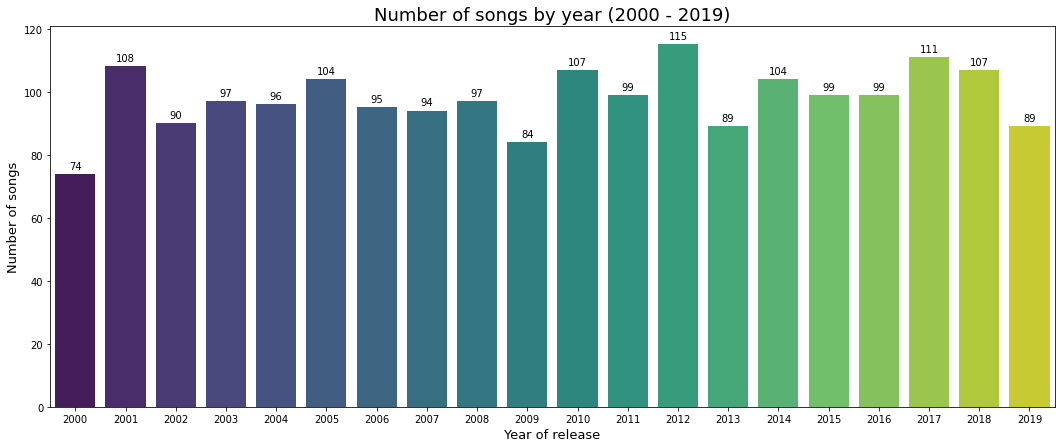

In [12]:
# Creating again a dataframe of songs by year, this time without 1998, 1999 and 2020
songs_by_year = top_songs.groupby("year").size().to_frame(name = 'songs').reset_index()

# plotting a bar chart
plt.figure(figsize = (18,7))
plots = sns.barplot(x = 'year', y = 'songs', data = songs_by_year, palette = 'viridis')

# Iterrating over the bars one-by-one to create the value labels
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done
      ## x-coordinate: bar.get_x() + bar.get_width() / 2
      ## y-coordinate: bar.get_height()
      ## decimals of annotation: '.0f'
      ## free space to be left to make graph pleasing: (0, 8)
      ## ha and va stand for the horizontal and vertical alignment

        plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    

# naming the x-axis and the y-axis
plt.xlabel('Year of release', size = 13)
plt.ylabel('Number of songs', size = 13)
  
# title of the graph
plt.title('Number of songs by year (2000 - 2019)', size = 18)
  
# function to show the plot
plt.show()

We can conclude that, from 2000 to 2019:

The highests number of hit songs were in the year of:

* **2012** (115 top hits); 
* **2017** (111 top hits); 
* **2001** (108 top hits).

On the other side, thee lowest numbers of hit songs were in the year of:

* **2000** (74 top hits);
* **2009** (84 top hits); 
* **2013** and **2019** (89 top hits each)

In [13]:
#pd.set_option('display.max_rows', None)
#pd.options.display.max_rows = 100

#display(top_songs[(top_songs.year == 2012)])

Let's see if we can find something especial about the categories (mood, properties and context) of the songs from the best and worst years. We will filter the data in two groups and make a violin chart.

The violin chart will help us to visualize if we are dealing with some multimodal or uniform data distribution.

In [14]:
# Creating a new filtered datafram containing only the top and bottom years of hits

top_down_features = top_songs[(top_songs.year == 2012) |
                              (top_songs.year == 2017) |
                              (top_songs.year == 2001) |
                              (top_songs.year == 2000) |
                              (top_songs.year == 2009) |
                              (top_songs.year == 2013) |
                              (top_songs.year == 2019)]

# Creating a new column with a flag indicating if top or bottom year

# create a list of our conditions
conditions = [
    (top_down_features['year'] == 2012) | (top_down_features['year'] == 2017) | (top_down_features['year'] == 2001),
    (top_down_features['year'] == 2000) | (top_down_features['year'] == 2009) | (top_down_features['year'] == 2013) | (top_down_features['year'] == 2019)
    ]

# create a list of the values we want to assign for each condition
values = ['top_years', 'bottom_years']

# create a new column and use np.select to assign values to it using our lists as arguments
top_down_features['year_top_bottom_hits'] = np.select(conditions, values)

display(top_down_features[['year','year_top_bottom_hits']] \
        .groupby(['year', 'year_top_bottom_hits']) \
        .size().to_frame(name = 'songs').reset_index())

,year,year_top_bottom_hits,songs
0,2000,bottom_years,74
1,2001,top_years,108
2,2009,bottom_years,84
3,2012,top_years,115
4,2013,bottom_years,89
5,2017,top_years,111
6,2019,bottom_years,89


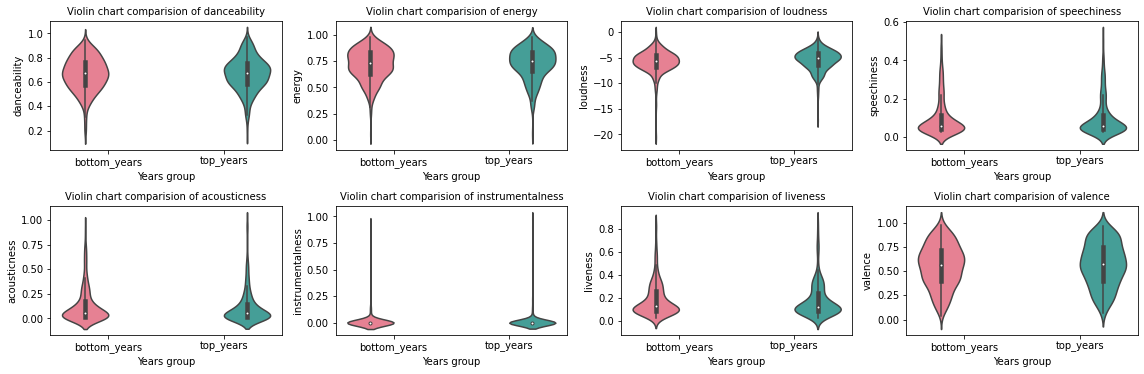

In [15]:
# Ploting the violin charts using subplots()

plt.subplots(figsize=(16, 10),sharey=True)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# danceability
# using subplot function and creating plot one
ax1 = plt.subplot(4,4,1)  # row 1, column 2, count 1

sns.violinplot( x = "year_top_bottom_hits",    \
               y ="danceability",              \
               data = top_down_features,       \
               hue = "year_top_bottom_hits",   \
               linewidth=1.5,                  \
               palette = "husl")

plt.title("Violin chart comparision of danceability", loc="center",fontsize=10)

plt.xlabel("Years group")
plt.ylabel("danceability")
plt.legend([],[], frameon=False)
 
                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# energy
ax2 = plt.subplot(4, 4, 2)

sns.violinplot( x = "year_top_bottom_hits",    \
               y ="energy",                    \
               data = top_down_features,       \
               hue = "year_top_bottom_hits",   \
               linewidth=1.5,                  \
               palette = "husl")

plt.title("Violin chart comparision of energy", loc="center", fontsize=10)

plt.xlabel("Years group")
plt.ylabel("energy")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# loudness
ax3 = plt.subplot(4,4,3)

sns.violinplot( x = "year_top_bottom_hits",  \
               y ="loudness",                \
               data = top_down_features,     \
               hue = "year_top_bottom_hits", \
               linewidth=1.5,                \
               palette = "husl")

plt.title("Violin chart comparision of loudness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("loudness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# speechiness
ax4 = plt.subplot(4, 4, 4)

sns.violinplot( x = "year_top_bottom_hits",  \
               y ="speechiness",             \
               data = top_down_features,     \
               hue = "year_top_bottom_hits", \
               linewidth=1.5,                \
               palette = "husl")

plt.title("Violin chart comparision of speechiness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("speechiness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# acousticness
ax5 = plt.subplot(4, 4, 5)

sns.violinplot( x = "year_top_bottom_hits",  \
               y ="acousticness",            \
               data = top_down_features,     \
               hue = "year_top_bottom_hits", \
               linewidth=1.5,                \
               palette = "husl")

plt.title("Violin chart comparision of acousticness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("acousticness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# instrumentalness
ax6 = plt.subplot(4, 4, 6)

sns.violinplot( x = "year_top_bottom_hits",    \
               y ="instrumentalness",          \
               data = top_down_features,       \
               hue = "year_top_bottom_hits",   \
               linewidth=1.5,                  \
               palette = "husl")

plt.title("Violin chart comparision of instrumentalness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("instrumentalness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# liveness
ax7 = plt.subplot(4, 4, 7)

sns.violinplot( x = "year_top_bottom_hits",   \
               y ="liveness",                 \
               data = top_down_features,      \
               hue = "year_top_bottom_hits",  \
               linewidth=1.5,                 \
               palette = "husl")

plt.title("Violin chart comparision of liveness", loc="center", fontsize=10)
plt.xlabel("Years group")
plt.ylabel("liveness")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# valence
ax8 = plt.subplot(4, 4, 8)

sns.violinplot( x = "year_top_bottom_hits",           \
               y ="valence",data = top_down_features, \
               hue = "year_top_bottom_hits",          \
               linewidth=1.5,                         \
               palette = "husl")

plt.title("Violin chart comparision of valence", loc="center", fontsize=10)

plt.xlabel("Years group")
plt.ylabel("valence")
plt.legend([],[], frameon=False)

                         #-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

# space between the plots
plt.tight_layout()
 
# show plot
plt.show()

## 5. Hypothesis Testing

<a id="section-five"></a>

### a. Normality Test
<a id="subsection-5a"></a>

Before doing the hypothesis test, we need to verify if we are dealing with normal distribution dataset. That's important because it will dictate what kind of test (parametrical or nonparametrical) we are going to use to test our hypothesis.

First, let's formulate our null and alternative hypothesis:

* **H0** - The feature **is distributed normally**

* **H1** - The feature **is NOT distributed normally**

Let's set our **significance level at 5%** (0.05).

In [16]:
# droping all the non-music feature variables
normality_sample = top_down_features.drop(['artist','song','duration_ms','explicit','year','popularity','key','mode','tempo','genre'], axis=1)


# defining the normality test function (Shapiro Wilk test)

def normal_test(feature, array, alpha=0.05):
    stat, pval = shapiro(array)
    
    if pval < alpha:
        print(f'Reject H0. The {feature} feature is NOT distributed normally.')
        print('P-Value:', f'{pval:.20f}')
        print('Statistic:', f'{stat:.3f}')
    
    else:
        print(f'Accept H0. The {feature} feature is distributed normally.')
        print('P-Value:', f'{pval:.20f}')
        print('Statistic:', f'{stat:.3f}')

Reject H0. The danceability feature is NOT distributed normally.
P-Value: 0.00001947630516951904
Statistic: 0.988


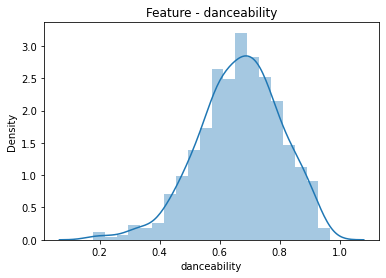

Reject H0. The energy feature is NOT distributed normally.
P-Value: 0.00000000000215608087
Statistic: 0.961


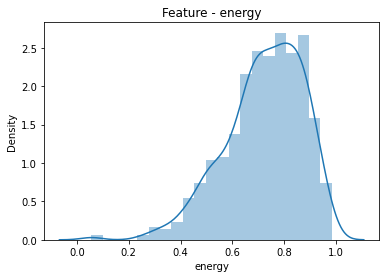

Reject H0. The loudness feature is NOT distributed normally.
P-Value: 0.00000000000000001664
Statistic: 0.927


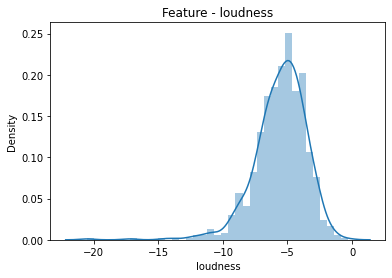

Reject H0. The speechiness feature is NOT distributed normally.
P-Value: 0.00000000000000000000
Statistic: 0.730


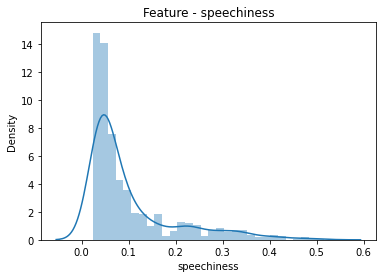

Reject H0. The acousticness feature is NOT distributed normally.
P-Value: 0.00000000000000000000
Statistic: 0.716


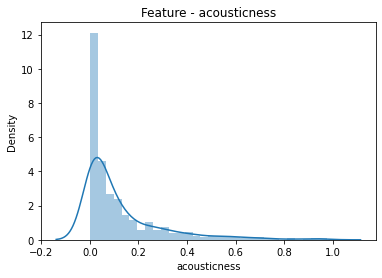

Reject H0. The instrumentalness feature is NOT distributed normally.
P-Value: 0.00000000000000000000
Statistic: 0.160


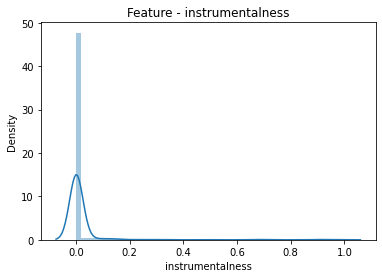

Reject H0. The liveness feature is NOT distributed normally.
P-Value: 0.00000000000000000000
Statistic: 0.798


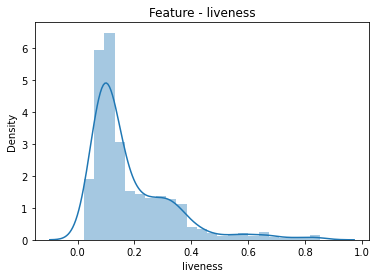

Reject H0. The valence feature is NOT distributed normally.
P-Value: 0.00000003536906945101
Statistic: 0.979


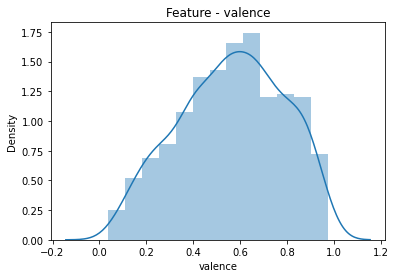

In [17]:
# Looping the test through all the features

for column in normality_sample.drop('year_top_bottom_hits', axis = 1).columns:
    
    normal_test(column, normality_sample[column].values)
    
    plt.title(f'Feature - {column}')
    sns.distplot(normality_sample[column])
    plt.show()

### b. Hypothesis Test
<a id="subsection-5b"></a>

Now that we know that all of our dataset of music features are **NOT** normally distributed, let's start the hypothesis test using *nonparametric test* (Mann-Whitney test).

Again, let's formulate our null and alternative hypothesis:

* **H0** - There are **no differences** between the top and bottom music group about that feature

* **H1** - There **are differences** between the top and bottom music group about that feature

Let's set our **significance level at 5%** (0.05).

In [18]:
# Defining the Hypothesis Test function
# Since our data in the samples are not normally distributed, we will use the nonparametric Mann-Whitney test.

def teste_hipotese(array1, array2, alpha=0.05):
    stat, pval = mannwhitneyu(array1, array2)
    
    if pval > alpha:
        print('Accept H0 - There is no significant difference between the groups.')
        print('Statistic:', f'{stat:.3f}')
        print('P-Value:', f'{pval:.20f}')
        print('\n')
    
    if pval < alpha:
        print('Reject H0 - There are significant differences between the groups.')
        print('Statistic:', f'{stat:.3f}')
        print('P-Value:', f'{pval:.20f}')
        print('\n')

In [19]:
# Looping the test through all the features
    
features_influenciadoras = []

for column in normality_sample.drop('year_top_bottom_hits', axis=1).columns:
    
    top_years = normality_sample.loc[normality_sample['year_top_bottom_hits'] == 'top_years']
    bottom_years = normality_sample.loc[normality_sample['year_top_bottom_hits'] == 'bottom_years']
    
    array_t = top_years[column].tolist()
    array_b = bottom_years[column].tolist()
    
    print(column)
    
    hipotese = teste_hipotese(array_t, array_b)

danceability
Accept H0 - There is no significant difference between the groups.
Statistic: 56243.000
P-Value: 0.95845257562811791985


energy
Accept H0 - There is no significant difference between the groups.
Statistic: 58915.000
P-Value: 0.26324469408411488303


loudness
Reject H0 - There are significant differences between the groups.
Statistic: 62144.000
P-Value: 0.01605100190808307625


speechiness
Accept H0 - There is no significant difference between the groups.
Statistic: 56672.000
P-Value: 0.82326205580004629958


acousticness
Accept H0 - There is no significant difference between the groups.
Statistic: 52814.000
P-Value: 0.18805582124370245900


instrumentalness
Accept H0 - There is no significant difference between the groups.
Statistic: 56287.000
P-Value: 0.93958981124602392043


liveness
Accept H0 - There is no significant difference between the groups.
Statistic: 54852.000
P-Value: 0.61511056553848986184


valence
Accept H0 - There is no significant difference between the 

## 6. Conclusion

<a id="section-six"></a>

In conclusion:

* Our data for all the music features variables are **NOT distributed normally**, therefore, we used nonparametric test for hypothesis verification;

* Using the *Mann-Whitney test*, we conclude that the only music feature that is statistically different between the group of years with most successful songs and the group of years with least number of songs is the **loudness**.